In [ ]:
!pip install fastf1

In [ ]:
import fastf1.plotting
import matplotlib.pyplot as plt

In [ ]:
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

In [ ]:
# Load the session
session = fastf1.get_session(2023, 'Spain', 'R')
session.load()
laps = session.laps

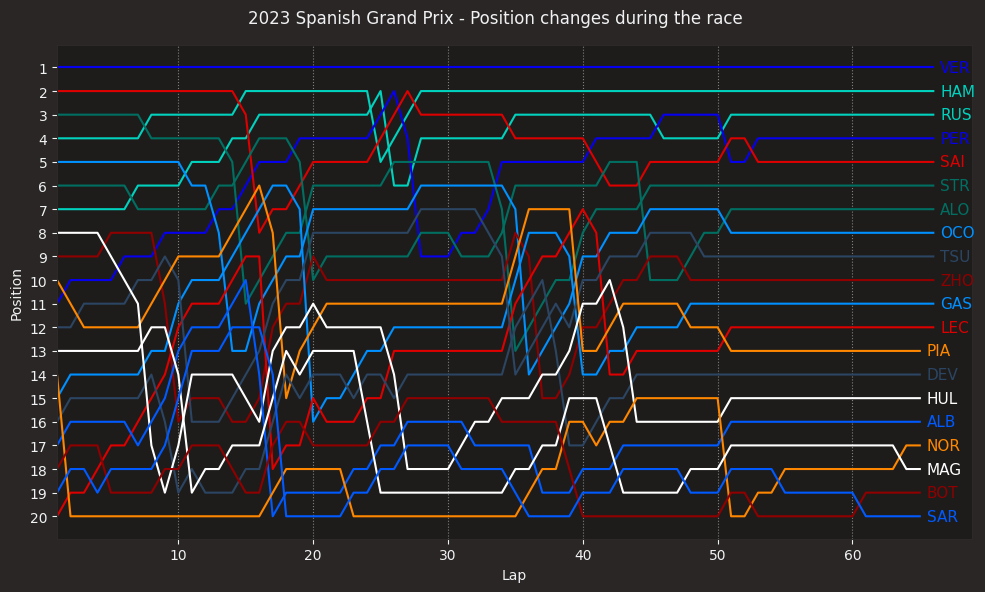

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.suptitle(f"{session.event.year} {session.event.EventName} - Position changes during the race")

# Get abbreviation names, color and then plot their position over the number of laps.
for driver in session.drivers:
    driver_laps = session.laps.pick_driver(driver)

    team = driver_laps['Team'].iloc[0]    #or 'Driver' (their colors)
    color = fastf1.plotting.team_color(team)
    driver_abb = driver_laps['Driver'].iloc[0]

    ax.plot(driver_laps['LapNumber'], driver_laps['Position'], label=driver_abb, color=color)

    # Add drivers name at the end of the line
    final_position = driver_laps['Position'].iloc[-1]
    final_lap = driver_laps['LapNumber'].iloc[-1]
    ax.annotate(driver_abb, (final_lap+0.5, final_position), color=color, va='center', fontsize=11)

#Some settings
ax.invert_yaxis()
ax.set_xlabel('Lap')
ax.set_ylabel('Position')
ax.set_yticks(range(1, 21))
ax.set_xlim(1, max(laps['LapNumber']) + 2.9)   # If an end line appears, change this

# Draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='dotted', color='grey')

plt.tight_layout()

plt.show()